In [2]:
# Jeśli nie masz zainstalowanego H2O, odkomentuj poniższe polecenie:
# !pip install -f https://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

import h2o
from h2o.automl import H2OAutoML
import pandas as pd
# Inicjalizacja H2O
h2o.init(max_mem_size="32G")  # możesz ustawić np. "16G" jeśli chcesz oszczędniej
# Wczytaj dane z pliku Parquet
df = pd.read_parquet("cars_ready_DecisionTree_small.parquet")

# Sprawdź kolumny
print(f"Liczba kolumn: {df.shape[1]}")

# Przekształć do H2OFrame
hf = h2o.H2OFrame(df)

# Zmienna docelowa
target = "Log_Price"

# Lista cech
features = [col for col in df.columns if col not in ["Log_Price", "cv_fold"]]

# Podział train/test zgodnie z kolumną cv_fold
train_hf = hf[hf["cv_fold"] != -1]
test_hf = hf[hf["cv_fold"] == -1]

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_411"; Java(TM) SE Runtime Environment (build 1.8.0_411-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.411-b09, mixed mode)
  Starting server from /Users/igorhebda/Desktop/PJA-dyplom/Data_collection_phase/.venv/lib/python3.13/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/7r/z43hm4_x3t9b482wypqy2s6r0000gn/T/tmp4nwdc27j
  JVM stdout: /var/folders/7r/z43hm4_x3t9b482wypqy2s6r0000gn/T/tmp4nwdc27j/h2o_igorhebda_started_from_python.out
  JVM stderr: /var/folders/7r/z43hm4_x3t9b482wypqy2s6r0000gn/T/tmp4nwdc27j/h2o_igorhebda_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Warsaw
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,4 months
H2O_cluster_name:,H2O_from_python_igorhebda_ppox5h
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,28.42 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


Liczba kolumn: 122
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
# Trening AutoML przez 10 minut, optymalizacja pod MAE
aml = H2OAutoML(
    max_runtime_secs=600,         # 10 minut
    seed=42,
    stopping_metric="MAE",
    sort_metric="MAE",
    nfolds=5,
    exclude_algos=[],             # lub np. ["DeepLearning"] jeśli chcesz szybciej
    verbosity="info"
)

# Uruchom trening na danych
aml.train(x=features, y=target, training_frame=train_hf)

AutoML progress: |
07:42:18.683: Project: AutoML_1_20250728_74218
07:42:18.838: Setting stopping tolerance adaptively based on the training frame: 0.002460071124636463
07:42:18.839: Build control seed: 42
07:42:18.842: training frame: Frame key: AutoML_1_20250728_74218_training_py_1_sid_89bb    cols: 122    rows: 165236  chunks: 70    size: 79371294  checksum: 3073488174256591800
07:42:18.842: validation frame: NULL
07:42:18.842: leaderboard frame: NULL
07:42:18.842: blending frame: NULL
07:42:18.842: response column: Log_Price
07:42:18.842: fold column: null
07:42:18.842: weights column: null
07:42:18.897: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (6g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20250728_74218


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    147                147                         824607                 15           15           15            74            1006          441.728

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0213152955038552
RMSE: 0.14599758732203488
MAE: 0.09936066036745655
RMSLE: 0.013154867535452482
Mean Residual Deviance: 0.0213152955038552

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.03557734417550777
RMSE: 0.18861957527125273
MAE: 0.12662154639072531
RMSLE: 0.016984033311588556
Mean Residual Deviance: 0.03557734417550777

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     nan        0            nan           nan           nan           nan           nan
loglikelihood           nan        0            nan           nan           nan           nan           nan
mae                     0.126622   0.000689493  0.12768       0.126468      0.125752      0.126619      0.126589
mean_residual_deviance  0.0355773  0.000747487  0.0361036     0.0355024     0.0343582     0.036254      0.0356684
mse                     0.0355773  0.000747487  0.0361036     0.0355024     0.0343582     0.036254      0.0356684
r2                      0.958747   0.00105599   0.958247      0.958538      0.960581      0.957892      0.958478
residual_deviance       0.0355773  0.000747487  0.0361036     0.0355024     0.0343582     0.036254      0.0356684
rmse                    0.188611   0.00199015   0.19001       0.188421      0.18536       0.190405      0.188861
rmsle                   0.0169831  0.000198179  0.0171306     0.0170211     0.0166399     0.0171046     0.0170194

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  --------------------
     2025-07-28 07:46:25  1 min 20.927 sec  0.0                0.9287460230917706   0.7398053093659566   0.8625691754087795
     2025-07-28 07:46:27  1 min 22.646 sec  5.0                0.5833388134965264   0.4557730222095225   0.3402841713315352
     2025-07-28 07:46:28  1 min 23.493 sec  10.0               0.3884473429148017   0.29360549679745335  0.15089133821756953
     2025-07-28 07:46:28  1 min 24.328 sec  15.0               0.2833787223723056   0.20529323222547197  0.08030350029336025
     2025-07-28 07:46:29  1 min 25.152 sec  20.0               0.22870300568332874  0.15949654252779227  0.052305064808588694
     2025-07-28 07:46:30  1 min 25.946 sec  25.0               0.20137031157445848  0.13700556865014693  0.04055000238359449
     2025-07-28 07:46:31  1 min 26.717 sec  30.0               0.18725688117754416  0.12576915594818613  0.035065139548340896
     2025-07-28 07:46:32  1 min 27.446 sec  35.0               0.17892256021464487  0.11957229102006182  0.03201328255376321
     2025-07-28 07:46:32  1 min 28.143 sec  40.0               0.17354566219889025  0.1158222612805632   0.03011809686805133
     2025-07-28 07:46:33  1 min 28.832 sec  45.0               0.16953609534167513  0.11314303598394927  0.028742487623701556
---  ---                  ---               ---                ---                  ---                  ---
     2025-07-28 07:46:39  1 min 35.172 sec  105.0              0

In [4]:
# Najlepszy model
leader = aml.leader
print(leader)

# Predykcja na zbiorze testowym
pred = leader.predict(test_hf)

# Obliczenie metryk
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_true = test_hf[target].as_data_frame().values.ravel()
y_pred = pred.as_data_frame().values.ravel()

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"📊 Test set performance:")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20250728_74218


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    147                147                         824607                 15           15           15            74            1006          441.728

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0213152955038552
RMSE: 0.14599758732203488
MAE: 0.09936066036745655
RMSLE: 0.013154867535452482
Mean Residual Deviance: 0.0213152955038552

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.03557734417550777
RMSE: 0.18861957527125273
MAE: 0.12662154639072531
RMSLE: 0.016984033311588556
Mean Residual Deviance: 0.035

/Users/igorhebda/Desktop/PJA-dyplom/Data_collection_phase/.venv/lib/python3.13/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/Users/igorhebda/Desktop/PJA-dyplom/Data_collection_phase/.venv/lib/python3.13/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [5]:
# Ranking modeli
lb = aml.leaderboard
lb.as_data_frame().head(10)  # top 10 modeli


/Users/igorhebda/Desktop/PJA-dyplom/Data_collection_phase/.venv/lib/python3.13/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,model_id,mae,rmse,mse,rmsle,mean_residual_deviance
0,GBM_1_AutoML_1_20250728_74218,0.126622,0.188620,0.035577,0.016984,0.035577
1,StackedEnsemble_AllModels_3_AutoML_1_20250728_...,0.127386,0.190216,0.036182,0.017136,0.036182
2,StackedEnsemble_BestOfFamily_1_AutoML_1_202507...,0.127638,0.190302,0.036215,0.017142,0.036215
3,StackedEnsemble_AllModels_2_AutoML_1_20250728_...,0.127638,0.190299,0.036214,0.017142,0.036214
4,StackedEnsemble_BestOfFamily_2_AutoML_1_202507...,0.127638,0.190300,0.036214,0.017142,0.036214
5,StackedEnsemble_BestOfFamily_3_AutoML_1_202507...,0.127639,0.190303,0.036215,0.017142,0.036215
6,StackedEnsemble_AllModels_1_AutoML_1_20250728_...,0.127639,0.190301,0.036215,0.017142,0.036215
7,GBM_4_AutoML_1_20250728_74218,0.128766,0.190606,0.036330,0.017159,0.036330
8,GBM_3_AutoML_1_20250728_74218,0.133047,0.194788,0.037942,0.017514,0.037942
9,GBM_2_AutoML_1_20250728_74218,0.135362,0.197322,0.038936,0.017719,0.038936


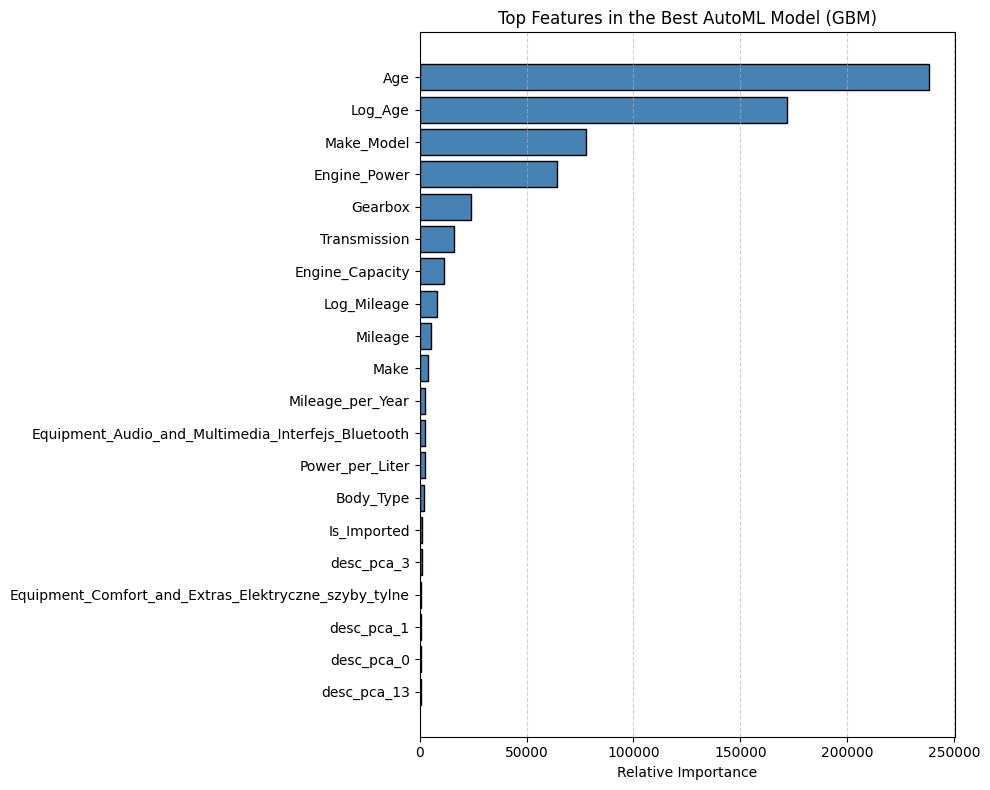

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Pobierz ważności cech z najlepszego modelu
varimp_df = leader.varimp(use_pandas=True)

# Wybierz top 20 cech
top_n = 20
top_features = varimp_df.head(top_n).iloc[::-1]  # odwróć, by najważniejsze były u góry

# Wykres
plt.figure(figsize=(10, 8))
plt.barh(top_features["variable"], top_features["relative_importance"], color="steelblue", edgecolor="black")
plt.xlabel("Relative Importance")
plt.title("Top Features in the Best AutoML Model (GBM)")
plt.grid(True, axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Zatrzymanie H2O po zakończeniu pracy
h2o.shutdown(prompt=False)